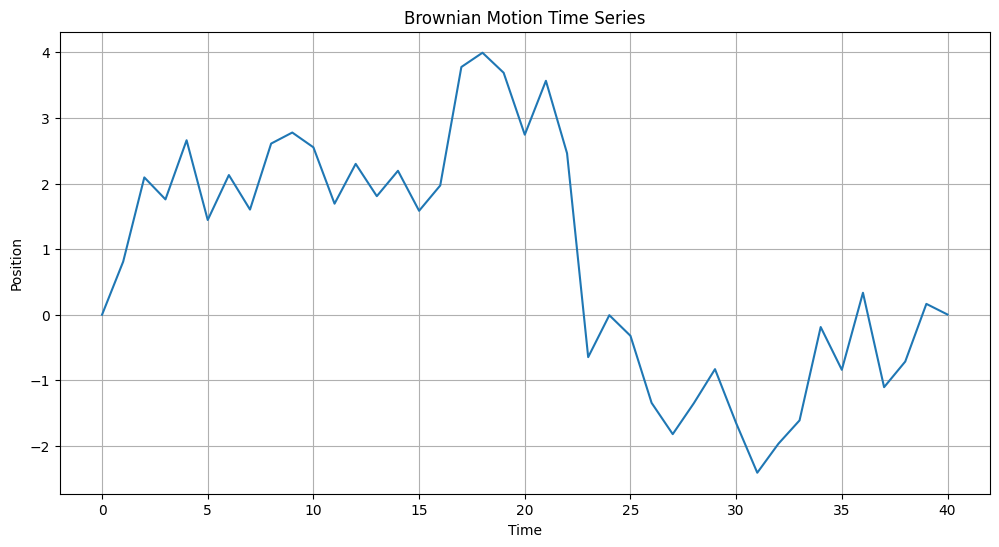

Mean: 0.8760
Standard Deviation: 1.7972
Min: -2.4081
Max: 3.9935


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def brownian_motion(n_steps, dt=1.0, x0=0, sigma=1):
    """
    Generate a Brownian motion time series.
    
    Parameters:
    n_steps (int): Number of time steps
    dt (float): Time step size
    x0 (float): Initial position
    sigma (float): Diffusion parameter (volatility)
    
    Returns:
    numpy array: Brownian motion time series
    """
    # Generate random steps
    random_steps = np.random.normal(loc=0, scale=sigma*np.sqrt(dt), size=n_steps)
    
    # Compute the Brownian motion by cumulative sum of random steps
    brownian_path = np.cumsum(random_steps)
    
    # Add the initial position
    brownian_path = np.insert(brownian_path, 0, x0)
    
    return brownian_path

# Set parameters
n_steps = 40  # Number of time steps
dt = 1       # Time step size
x0 = 0          # Initial position
sigma = 1       # Diffusion parameter

# Generate Brownian motion
time = np.linspace(0, n_steps*dt, n_steps+1)
brownian_series = brownian_motion(n_steps, dt, x0, sigma)

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(time, brownian_series)
plt.title('Brownian Motion Time Series')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.show()

# Print some statistics
print(f"Mean: {np.mean(brownian_series):.4f}")
print(f"Standard Deviation: {np.std(brownian_series):.4f}")
print(f"Min: {np.min(brownian_series):.4f}")
print(f"Max: {np.max(brownian_series):.4f}")

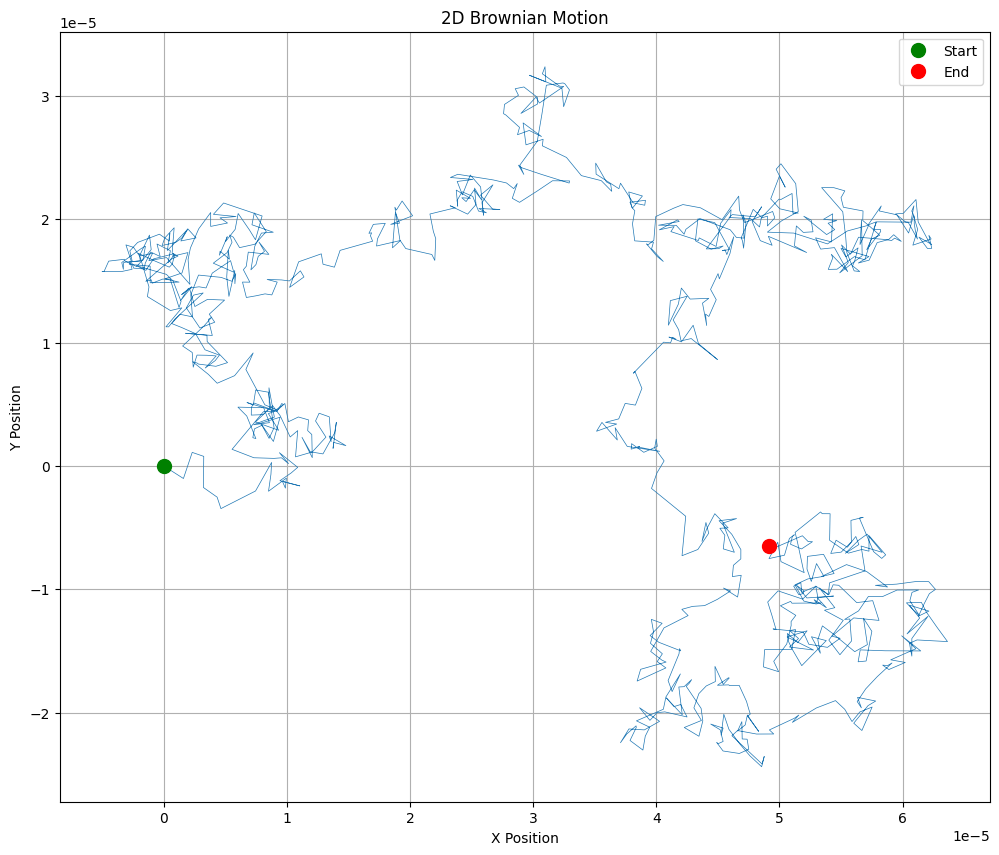

X - Mean: 0.0000, Std Dev: 0.0000
Y - Mean: 0.0000, Std Dev: 0.0000
Start: (0.0000, 0.0000)
End: (0.0000, -0.0000)
Total displacement: 0.0000


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def brownian_motion_2d(n_steps, dt=1.0, x0=0, y0=0, sigma=1):
    """
    Generate a 2D Brownian motion time series.
    
    Parameters:
    n_steps (int): Number of time steps
    dt (float): Time step size
    x0, y0 (float): Initial position
    sigma (float): Diffusion parameter (volatility)
    
    Returns:
    tuple: Two numpy arrays representing x and y coordinates of the Brownian motion
    """
    # Generate random steps for x and y
    random_steps_x = np.random.normal(loc=0, scale=sigma*np.sqrt(dt), size=n_steps)
    random_steps_y = np.random.normal(loc=0, scale=sigma*np.sqrt(dt), size=n_steps)
    
    # Compute the Brownian motion by cumulative sum of random steps
    x_path = np.cumsum(random_steps_x)
    y_path = np.cumsum(random_steps_y)
    
    # Add the initial position
    x_path = np.insert(x_path, 0, x0)
    y_path = np.insert(y_path, 0, y0)
    
    return x_path, y_path

# Set parameters
n_steps = 1000  # Number of time steps
dt = 0.01        # Time step size
x0, y0 = 0, 0    # Initial position
sigma = 0.00001        # Diffusion parameter

# Generate 2D Brownian motion
x_series, y_series = brownian_motion_2d(n_steps, dt, x0, y0, sigma)

# Plot the result
plt.figure(figsize=(12, 10))

# Plot the path
plt.plot(x_series, y_series, linewidth=0.5)
plt.title('2D Brownian Motion')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)

# Mark start and end points
plt.plot(x_series[0], y_series[0], 'go', markersize=10, label='Start')
plt.plot(x_series[-1], y_series[-1], 'ro', markersize=10, label='End')

plt.legend()
plt.axis('equal')  # Equal scaling on both axes
plt.show()

# Print some statistics
print(f"X - Mean: {np.mean(x_series):.4f}, Std Dev: {np.std(x_series):.4f}")
print(f"Y - Mean: {np.mean(y_series):.4f}, Std Dev: {np.std(y_series):.4f}")
print(f"Start: ({x_series[0]:.4f}, {y_series[0]:.4f})")
print(f"End: ({x_series[-1]:.4f}, {y_series[-1]:.4f})")
print(f"Total displacement: {np.sqrt((x_series[-1]-x_series[0])**2 + (y_series[-1]-y_series[0])**2):.4f}")

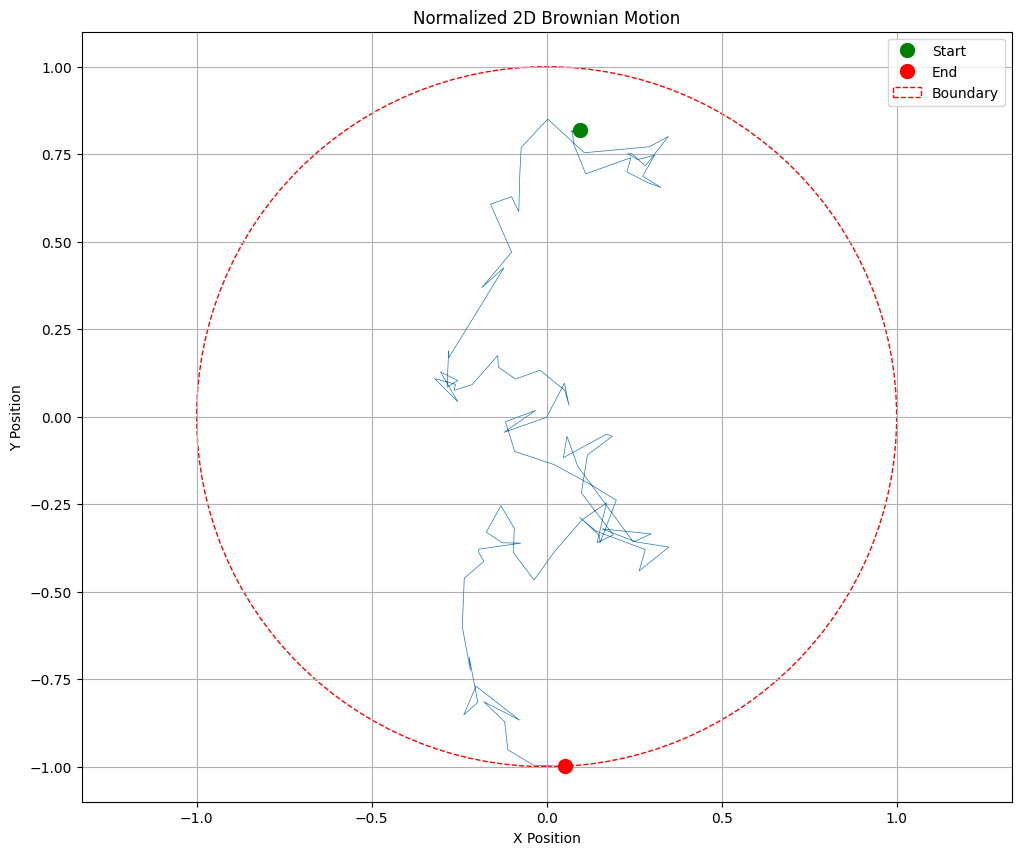

X - Mean: -0.0000, Std Dev: 0.1874
Y - Mean: -0.0000, Std Dev: 0.5092
Start: (0.0949, 0.8196)
End: (0.0531, -0.9986)
Max distance from origin: 1.0000


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def brownian_motion_2d_normalized(n_steps, dt=1.0, sigma=1, d=1):
    """
    Generate a normalized 2D Brownian motion time series.
    
    Parameters:
    n_steps (int): Number of time steps
    dt (float): Time step size
    sigma (float): Diffusion parameter (volatility)
    d (float): Maximum distance from origin
    
    Returns:
    tuple: Two numpy arrays representing x and y coordinates of the normalized Brownian motion
    """
    # Generate random steps for x and y
    random_steps_x = np.random.normal(loc=0, scale=sigma*np.sqrt(dt), size=n_steps)
    random_steps_y = np.random.normal(loc=0, scale=sigma*np.sqrt(dt), size=n_steps)
    
    # Compute the Brownian motion by cumulative sum of random steps
    x_path = np.cumsum(random_steps_x)
    y_path = np.cumsum(random_steps_y)
    
    # Center the path at (0,0)
    x_path -= np.mean(x_path)
    y_path -= np.mean(y_path)
    
    # Calculate the maximum distance from origin
    max_distance = np.max(np.sqrt(x_path**2 + y_path**2))
    
    # Normalize to fit within the circle of radius d
    x_path *= d / max_distance
    y_path *= d / max_distance
    
    return x_path, y_path

# Set parameters
n_steps = 100  # Number of time steps
dt = 0.01        # Time step size
sigma = 1        # Diffusion parameter
d = 1            # Maximum distance from origin

# Generate normalized 2D Brownian motion
x_series, y_series = brownian_motion_2d_normalized(n_steps, dt, sigma, d)

# Plot the result
plt.figure(figsize=(12, 10))

# Plot the path
plt.plot(x_series, y_series, linewidth=0.5)
plt.title('Normalized 2D Brownian Motion')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)

# Mark start and end points
plt.plot(x_series[0], y_series[0], 'go', markersize=10, label='Start')
plt.plot(x_series[-1], y_series[-1], 'ro', markersize=10, label='End')

# Draw the constraining circle
circle = plt.Circle((0, 0), d, fill=False, color='r', linestyle='--', label='Boundary')
plt.gca().add_artist(circle)

plt.legend()
plt.axis('equal')  # Equal scaling on both axes
plt.xlim(-d-0.1, d+0.1)
plt.ylim(-d-0.1, d+0.1)
plt.show()

# Print some statistics
print(f"X - Mean: {np.mean(x_series):.4f}, Std Dev: {np.std(x_series):.4f}")
print(f"Y - Mean: {np.mean(y_series):.4f}, Std Dev: {np.std(y_series):.4f}")
print(f"Start: ({x_series[0]:.4f}, {y_series[0]:.4f})")
print(f"End: ({x_series[-1]:.4f}, {y_series[-1]:.4f})")
print(f"Max distance from origin: {np.max(np.sqrt(x_series**2 + y_series**2)):.4f}")

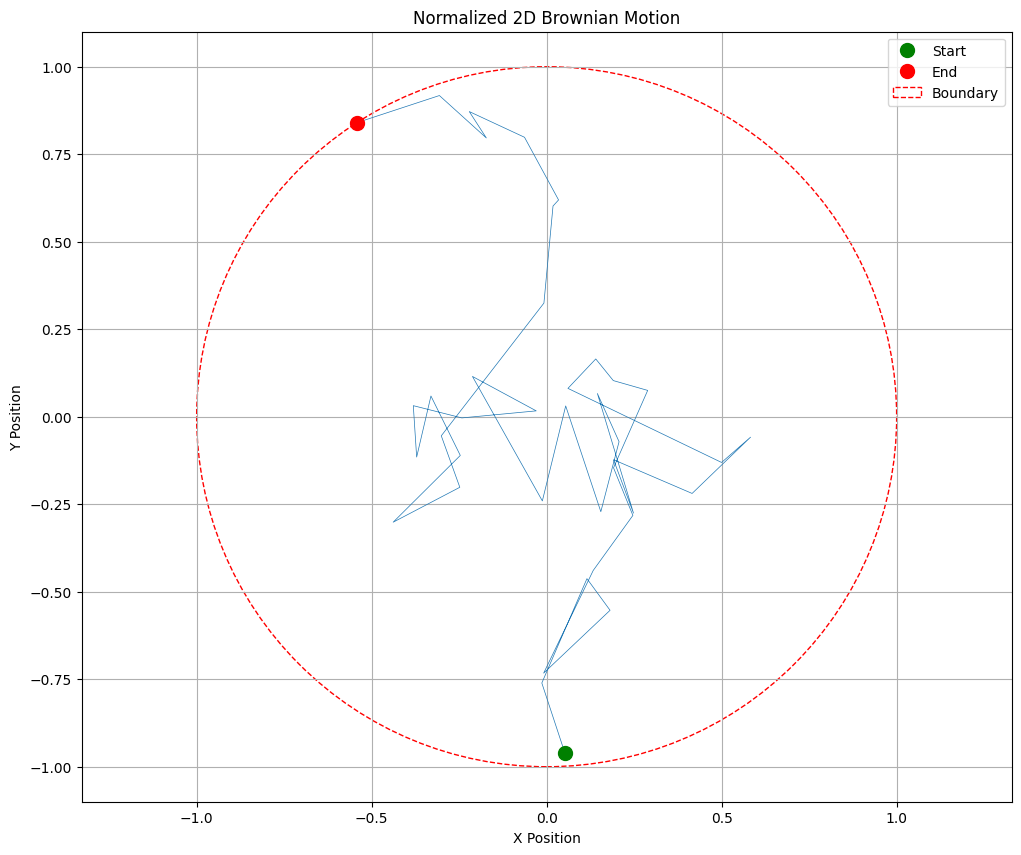

Mean: (-0.0000, 0.0000)
Std Dev: (0.2565, 0.4420)
Start: (0.0524, -0.9618)
End: (-0.5426, 0.8400)
Max distance from origin: 1.0000
[[ 0.05244085 -0.96181377]
 [-0.01379499 -0.76083531]
 [ 0.11513071 -0.46268669]
 [ 0.18119571 -0.55305975]
 [-0.00854504 -0.73259502]
 [ 0.13299896 -0.43931691]
 [ 0.24638886 -0.2819938 ]
 [ 0.19106908 -0.14592142]
 [ 0.28868135  0.07516655]
 [ 0.19035773  0.10325943]
 [ 0.14031134  0.16508789]
 [ 0.06081182  0.08101907]
 [ 0.49975146 -0.13068684]
 [ 0.58258774 -0.05840919]
 [ 0.41556755 -0.21919373]
 [ 0.19104983 -0.12283419]
 [ 0.24811625 -0.27543665]
 [ 0.14496098  0.06633766]
 [ 0.20685737 -0.07130711]
 [ 0.15479176 -0.27134275]
 [ 0.0543936   0.03084411]
 [-0.01229172 -0.24053719]
 [-0.21203234  0.11511007]
 [-0.02976264  0.01671217]
 [-0.242231   -0.0034049 ]
 [-0.38099019  0.03157557]
 [-0.37142281 -0.11532214]
 [-0.33061087  0.05921645]
 [-0.24672974 -0.11060875]
 [-0.43854391 -0.30135584]
 [-0.24809824 -0.20163065]
 [-0.30107726 -0.05452491]
 [-0.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def brownian_motion_2d_normalized(n_steps, dt=1.0, sigma=1, d=1):
    """
    Generate a normalized 2D Brownian motion time series.
    
    Parameters:
    n_steps (int): Number of time steps
    dt (float): Time step size
    sigma (float): Diffusion parameter (volatility)
    d (float): Maximum distance from origin
    
    Returns:
    numpy.ndarray: Array of 2D points representing the Brownian motion path
    """
    # Generate random steps for x and y
    random_steps = np.random.normal(loc=0, scale=sigma*np.sqrt(dt), size=(n_steps, 2))
    
    # Compute the Brownian motion by cumulative sum of random steps
    path = np.cumsum(random_steps, axis=0)
    
    # Center the path at (0,0)
    path -= np.mean(path, axis=0)
    
    # Calculate the maximum distance from origin
    max_distance = np.max(np.linalg.norm(path, axis=1))
    
    # Normalize to fit within the circle of radius d
    path *= d / max_distance
    
    return path

# Set parameters
n_steps = 40  # Number of time steps
dt = 1        # Time step size
sigma = 0.001        # Diffusion parameter
d = 1            # Maximum distance from origin

# Generate normalized 2D Brownian motion
path = brownian_motion_2d_normalized(n_steps, dt, sigma, d)

# Plot the result
plt.figure(figsize=(12, 10))

# Plot the path
plt.plot(path[:, 0], path[:, 1], linewidth=0.5)
plt.title('Normalized 2D Brownian Motion')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)

# Mark start and end points
plt.plot(path[0, 0], path[0, 1], 'go', markersize=10, label='Start')
plt.plot(path[-1, 0], path[-1, 1], 'ro', markersize=10, label='End')

# Draw the constraining circle
circle = plt.Circle((0, 0), d, fill=False, color='r', linestyle='--', label='Boundary')
plt.gca().add_artist(circle)

plt.legend()
plt.axis('equal')  # Equal scaling on both axes
plt.xlim(-d-0.1, d+0.1)
plt.ylim(-d-0.1, d+0.1)
plt.show()

# Print some statistics
print(f"Mean: ({np.mean(path[:, 0]):.4f}, {np.mean(path[:, 1]):.4f})")
print(f"Std Dev: ({np.std(path[:, 0]):.4f}, {np.std(path[:, 1]):.4f})")
print(f"Start: ({path[0, 0]:.4f}, {path[0, 1]:.4f})")
print(f"End: ({path[-1, 0]:.4f}, {path[-1, 1]:.4f})")
print(f"Max distance from origin: {np.max(np.linalg.norm(path, axis=1)):.4f}")


print(path)

In [50]:
import math

def is_point_in_rotated_viewport(point_x, point_y, viewport_center_x, viewport_center_y, viewport_radius, viewport_angle):
    # Step 1: Translate the point to the viewport's coordinate system
    translated_x = point_x - viewport_center_x
    translated_y = point_y - viewport_center_y
    
    # Step 2: Rotate the point back by -theta
    cos_theta = math.cos(-viewport_angle)
    sin_theta = math.sin(-viewport_angle)
    rotated_x = translated_x * cos_theta - translated_y * sin_theta
    rotated_y = translated_x * sin_theta + translated_y * cos_theta
    
    # Step 3: Check if the rotated point is within the square bounds
    return abs(rotated_x) <= viewport_radius and abs(rotated_y) <= viewport_radius

# Example usage
viewport_center_x = 0
viewport_center_y = 0
viewport_radius = 5  # Half the side length of the square
viewport_angle = math.pi / 4  # 45 degrees in radians

# Test points
point1 = (0, 5)
point2 = (5, 5)

print(f"Point {point1} is in viewport: {is_point_in_rotated_viewport(point1[0], point1[1], viewport_center_x, viewport_center_y, viewport_radius, viewport_angle)}")
print(f"Point {point2} is in viewport: {is_point_in_rotated_viewport(point2[0], point2[1], viewport_center_x, viewport_center_y, viewport_radius, viewport_angle)}")

Point (0, 5) is in viewport: True
Point (5, 5) is in viewport: False


In [52]:
import numpy as np

def is_point_in_rotated_viewport(point, viewport_center, viewport_radius, viewport_angle):
    # Convert inputs to numpy arrays if they aren't already
    point = np.array(point)
    viewport_center = np.array(viewport_center)
    
    # Step 1: Translate the point to the viewport's coordinate system
    translated_point = point - viewport_center
    
    # Step 2: Create rotation matrix
    rotation_matrix = np.array([
        [np.cos(-viewport_angle), -np.sin(-viewport_angle)],
        [np.sin(-viewport_angle),  np.cos(-viewport_angle)]
    ])
    
    # Apply rotation
    rotated_point = np.dot(rotation_matrix, translated_point)
    
    # Step 3: Check if the rotated point is within the square bounds
    return np.all(np.abs(rotated_point) <= viewport_radius)

# Example usage
viewport_center = np.array([0, 0])
viewport_radius = 5  # Half the side length of the square
viewport_angle = np.pi / 4  # 45 degrees in radians

# Test points
point1 = np.array([5, 5])
point2 = np.array([0, 5])

print(f"Point {point1} is in viewport: {is_point_in_rotated_viewport(point1, viewport_center, viewport_radius, viewport_angle)}")
print(f"Point {point2} is in viewport: {is_point_in_rotated_viewport(point2, viewport_center, viewport_radius, viewport_angle)}")

Point [5 5] is in viewport: False
Point [0 5] is in viewport: True
